In [20]:
#importing libraries

import random as rd
import hashlib
import phe
import rsa
import matplotlib.pyplot as plt
import numpy as np
from timeit import default_timer as timer


In [21]:
#declaring of varibles
numberOfExperts = 3
numberOfCandidates = 8
#collection of homomophic public and private keys
dictionaryOfExpertPublicKeys = {}
dictionaryOfExpertPrivateKeys = {}

dictionaryOfCandidatesPublicKeys = {}
dictionaryOfCandidatesPrivateKeys = {}

#Variables for third framework@
dictionaryOfRandomNumberPerExpert = {}
dictionaryOftheSumOfRandomNumbermappedToEveryCandidate = {}
dictionaryOfRandomNumberGatheredFromOtherExperts = {}
dictionaryOfRandomNumberMappedToEveryCandidate = {}

#Collection of rsa public and private keys for digital signature
dictOfrsaPubKey = {}
dictOfrsaPriKey = {}
marksToCandidates = []


In [22]:
def initVariables(E,C):
    global numberOfExperts, numberOfCandidates
    numberOfExperts, numberOfCandidates = E, C

In [23]:
#this part of the code create the public and private homomorphic key pairs
def generateHomomorphickeyPairs():
    global publicKeyEmployer,privateKeyEmployer
    publicKeyEmployer,privateKeyEmployer = phe.generate_paillier_keypair(n_length=128)
    for i in range(numberOfExperts):
        x,y = phe.generate_paillier_keypair(n_length=128)
        dictionaryOfExpertPublicKeys[i] = x
        dictionaryOfExpertPrivateKeys[i] = y
        
    for i in range(numberOfCandidates):
        x,y = phe.generate_paillier_keypair(n_length=128)
        dictionaryOfCandidatesPublicKeys[i]= x
        dictionaryOfCandidatesPrivateKeys[i] = y 


In [24]:
#code to generate rsa public and private keys
def generateRSAKeys():
    global dictOfrsaPubKey, dicOfrsaPriKey
    for i in range(numberOfExperts):
        (pubkey, privkey) = rsa.newkeys(512)
        dictOfrsaPubKey[i],dictOfrsaPriKey[i] = pubkey, privkey 

In [25]:
# function to create digital signature
def createDigitalSignature(message,i):
    privkey = dictOfrsaPriKey[i]
    temp = str(message).encode()
    signature = rsa.sign(temp, privkey, 'SHA-1')
    return signature

In [26]:
def generateRandomNumberForEveryExpert():
    # global dictionaryOfRandomNumberPerExpert
    generatedRandomNumbers = [rd.randint(0,100) for x in range(numberOfExperts)]
    # print(generatedRandomNumbers)
    return generatedRandomNumbers
    # print(dictionaryOfSumGeneratedPerRandomNumber)

In [27]:
def forwardTheRespectiveRandomNumbers(idR,generatedRandomNumbers):
    encryptedRandomNumber = dictionaryOfExpertPublicKeys[idR].raw_encrypt(generatedRandomNumbers[idR])
    message = encryptedRandomNumber
    return message
# ,createDigitalSignature(encryptedRandomNumber,idS)

In [28]:
def performSMPCBetweenExperts():
    #this part of the code simulates the part where expert follow the smpc process
    #the random number assgned by all the experts has been mapped for every candidate
    
    for i in range(numberOfCandidates):
        matrixOfForwardedMessages = [[0 for i in range(numberOfExperts)] for j in range(numberOfExperts)]
        sumList = []
        for j in range(numberOfExperts):
            generatedRandomNumbers = generateRandomNumberForEveryExpert()
            sumOfTheRandomNumbers = sum(generatedRandomNumbers) 
            sumList.append(sumOfTheRandomNumbers)

            for k in range(numberOfExperts):
                if(j != k):
                    message = forwardTheRespectiveRandomNumbers(k,generatedRandomNumbers)
                    matrixOfForwardedMessages[j][k] = message
                else:
                    matrixOfForwardedMessages[j][k] = generatedRandomNumbers[j]
        dictionaryOfRandomNumberMappedToEveryCandidate[i] = matrixOfForwardedMessages
        dictionaryOftheSumOfRandomNumbermappedToEveryCandidate[i] = sumList
    # print(dictionaryOfRandomNumberMappedToEveryCandidate)
    # print(dictionaryOftheSumOfRandomNumbermappedToEveryCandidate)
    # print(dictionaryOfSumGeneratedPerRandomNumber)
    

    

In [29]:
def generateHiddenScoreFrameWork3():
    global marksToCandidates
    marksToCandidates = [[0 for i in range(numberOfCandidates)] for j in range(numberOfExperts)]
    for i in range(numberOfCandidates):
        for j in range(numberOfExperts):
            mark = rd.randint(0,100)
            hiddenScore = mark + dictionaryOftheSumOfRandomNumbermappedToEveryCandidate[i][j]
            sum  = 0
            for k in range(numberOfExperts):
                if(j != k):
                    encryptedRandomNumber = dictionaryOfRandomNumberMappedToEveryCandidate[i][k][j]
                    # print(encryptedRandomNumber)
                    sum  = sum + dictionaryOfExpertPrivateKeys[j].raw_decrypt(encryptedRandomNumber)
                else: 
                    sum = sum + dictionaryOfRandomNumberMappedToEveryCandidate[i][j][j]
            hiddenScore  = hiddenScore -sum
            # print(hiddenScore)
            marksToCandidates[j][i] = hiddenScore
            


In [30]:
def candidateManagerFrameWork3BestCandidate():
    array = []
    for i in range(numberOfCandidates):
        sum = 0
        for j in range(numberOfExperts):
            cummulativeScore = marksToCandidates[j][i]
            sum  = sum + cummulativeScore
        array.append(sum)
    # print(array)
    # print(array.index(max(array)))

In [31]:
def expertFunctionToGiveMarks():
    performSMPCBetweenExperts()
    generateHiddenScoreFrameWork3()

In [32]:
def plotGraph(a,b):
    plt.plot(a,b,marker = "*")
    plt.xlabel("numberOfcandidates")
    plt.ylabel("time Consumed")
    plt.show()

In [33]:
def runSimulation():
    experts = 10
    timeList = []
    candidates = [5,10,20,30,40,50,60,70,80,90,100,110,120,130]
    for i in range(len(candidates)):
        start = timer()
        initVariables(experts,candidates[i])
        generateHomomorphickeyPairs()
        generateRSAKeys()
        expertFunctionToGiveMarks()
        candidateManagerFrameWork3BestCandidate()
        end = timer()
        timeList.append(end - start)
    # plotGraph(candidates[0:i+1],timeList)
    return timeList

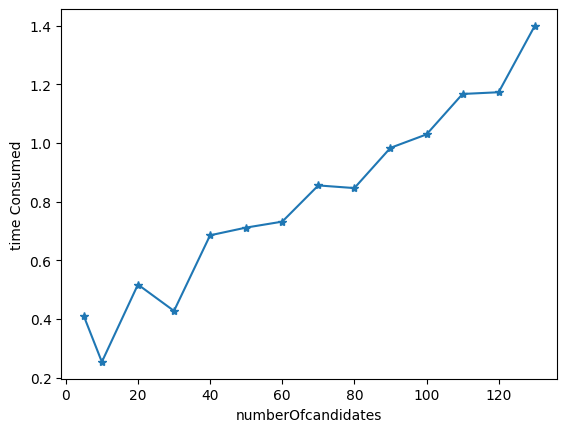

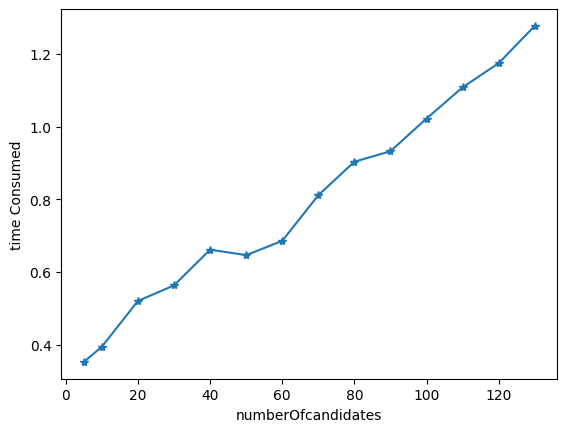

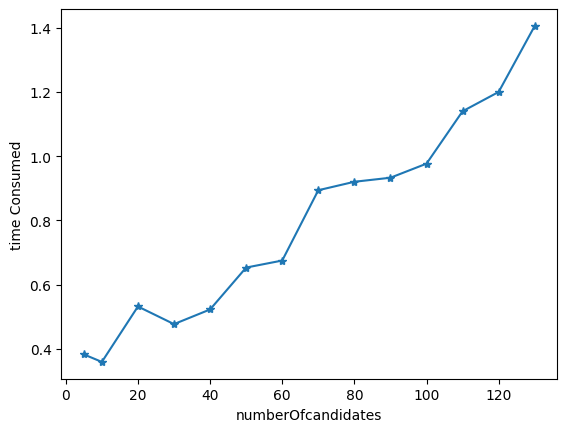

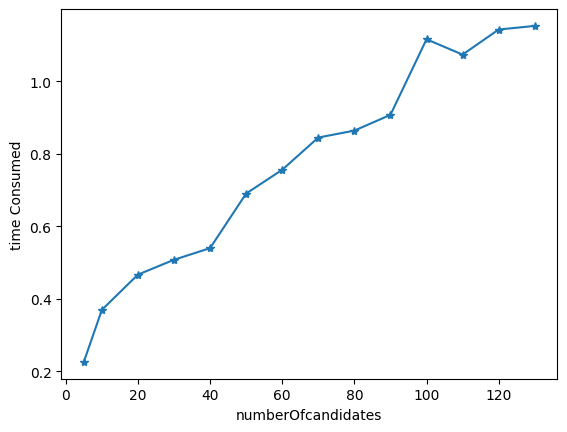

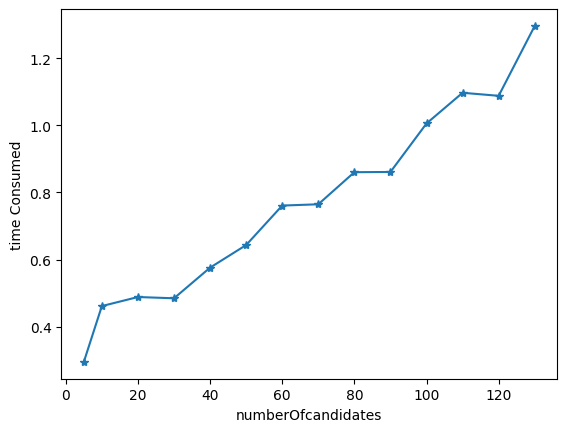

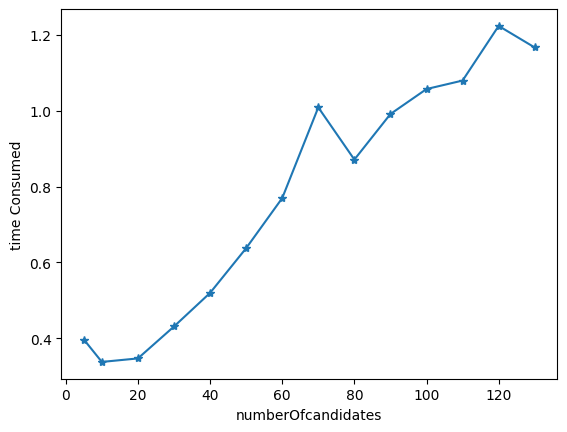

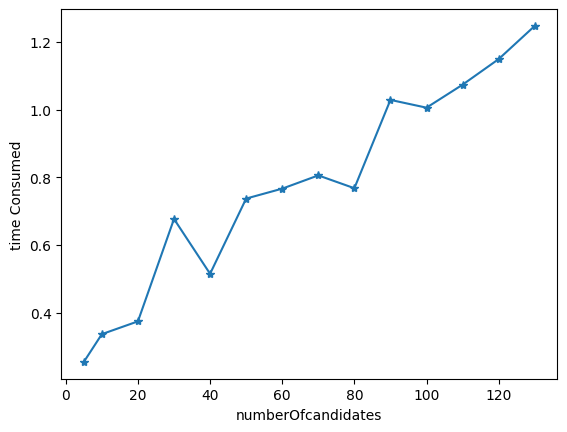

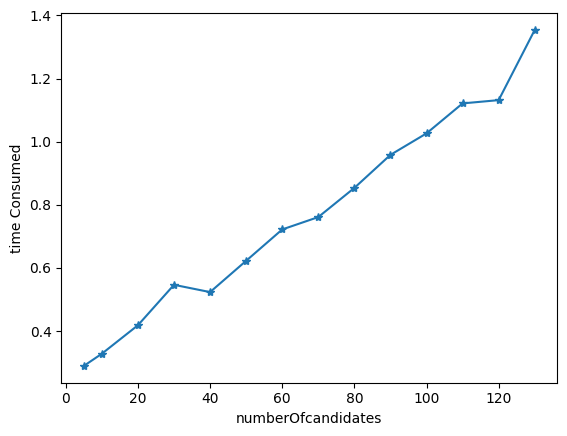

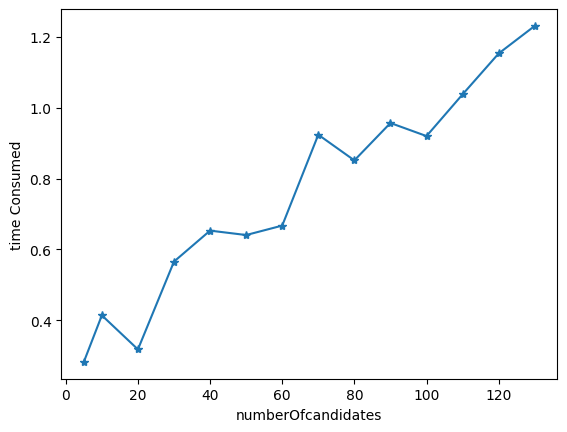

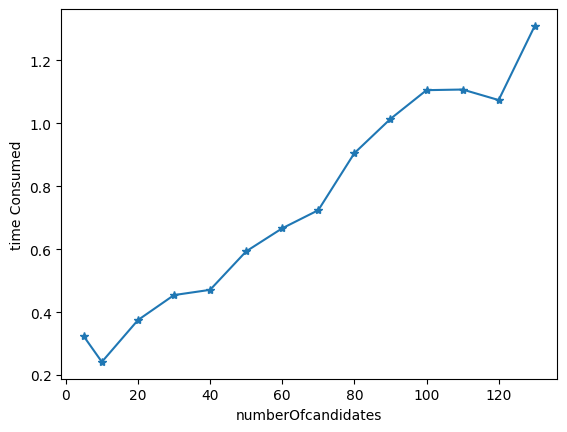

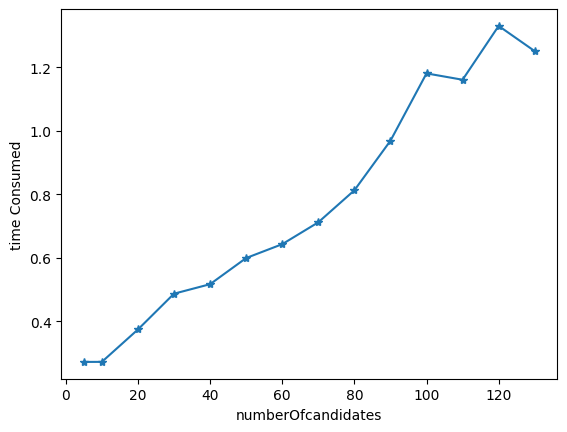

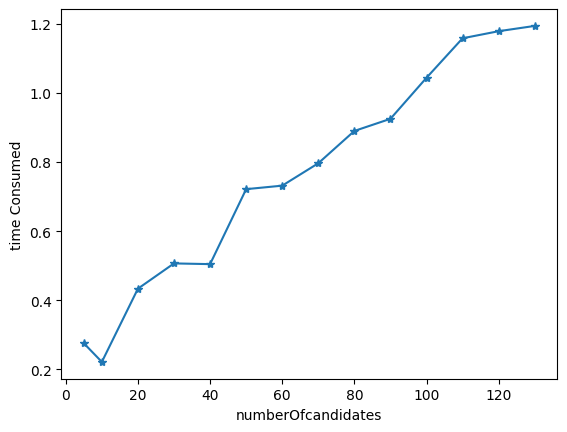

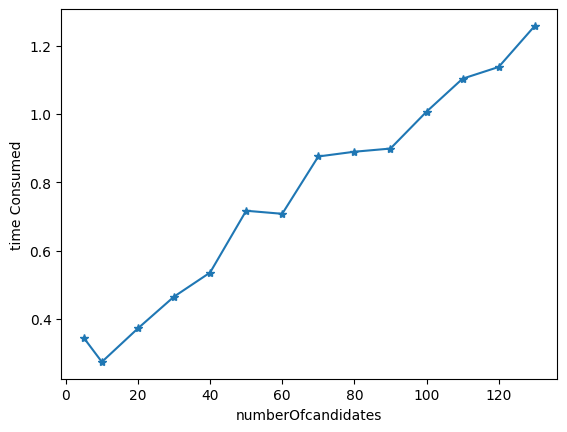

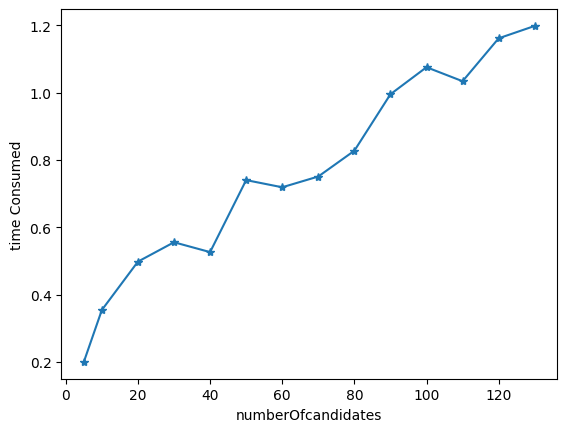

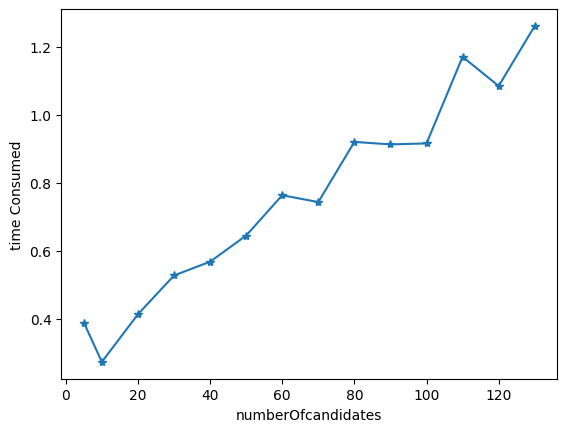

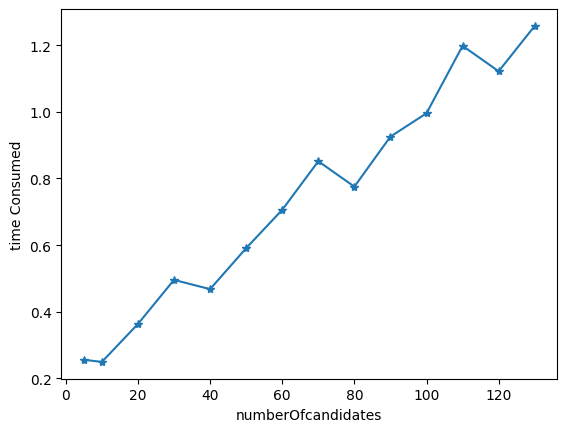

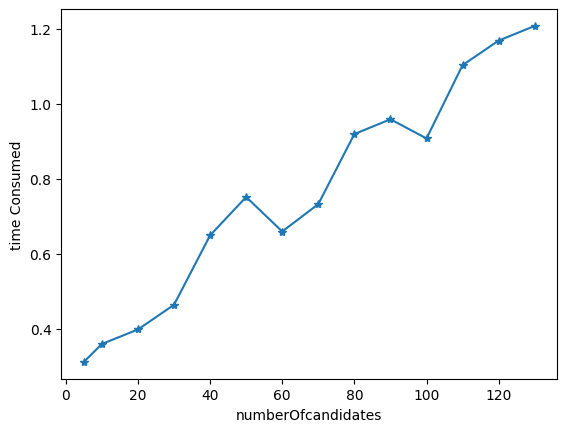

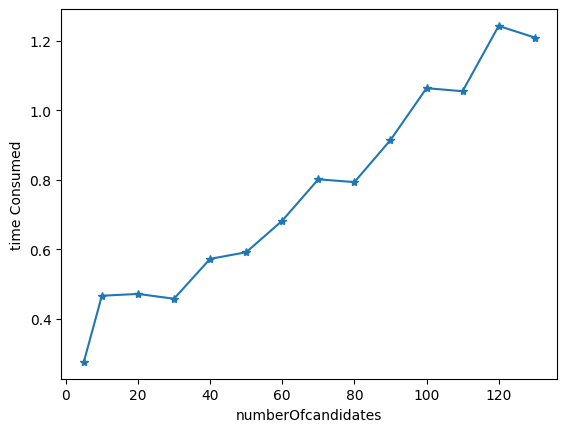

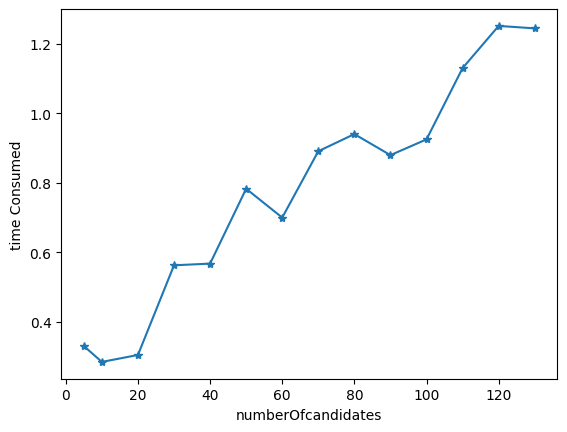

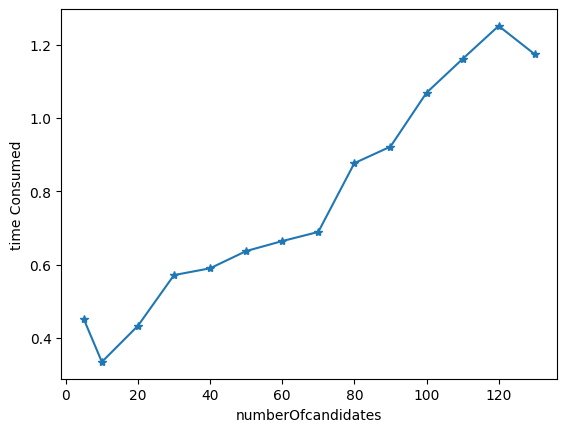

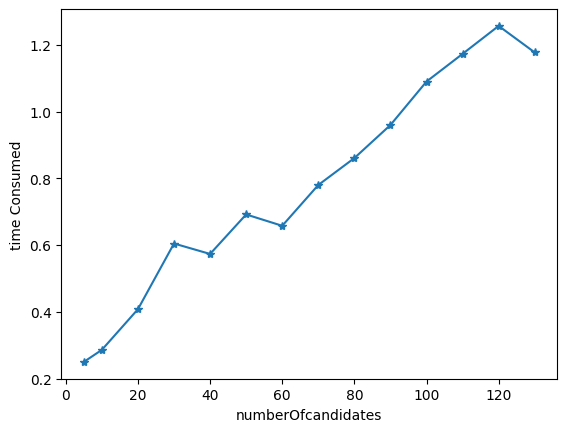

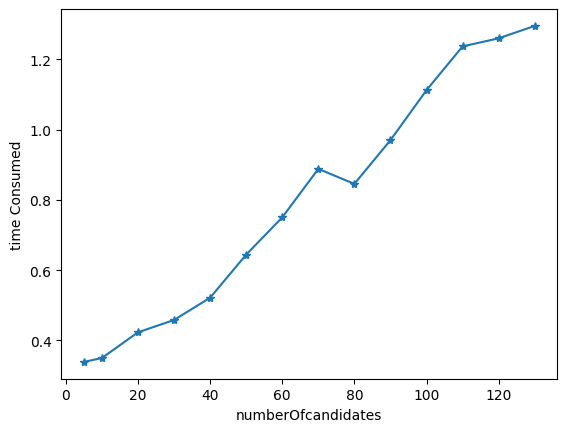

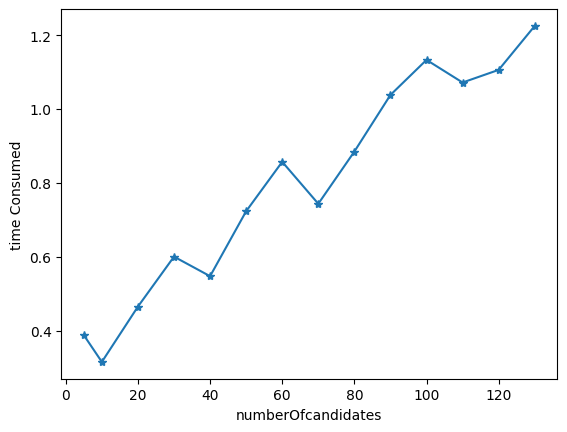

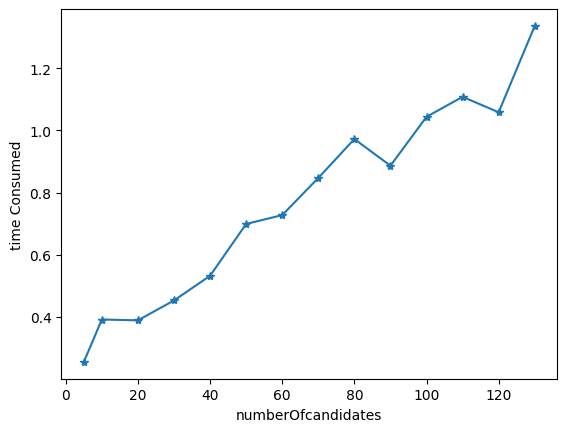

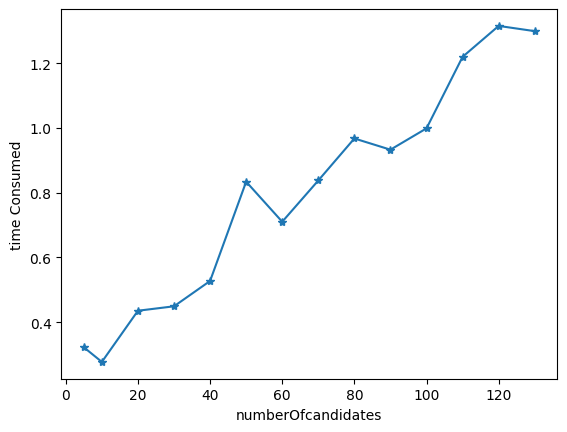

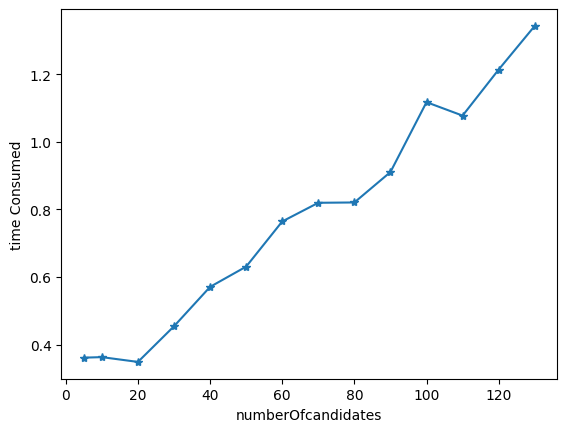

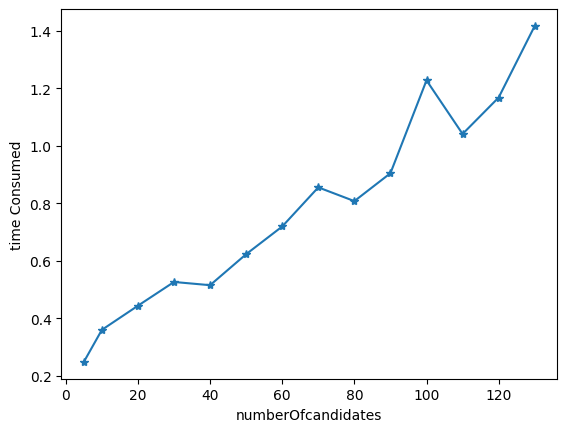

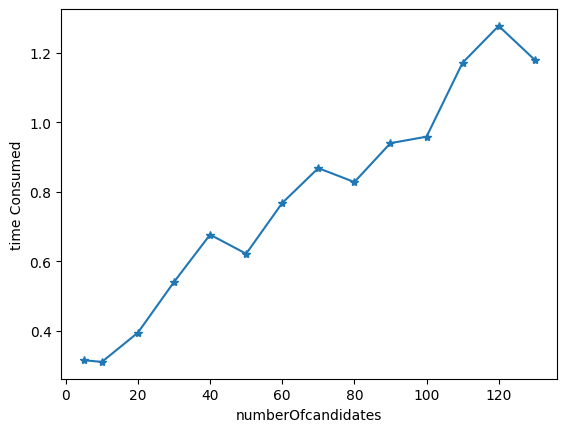

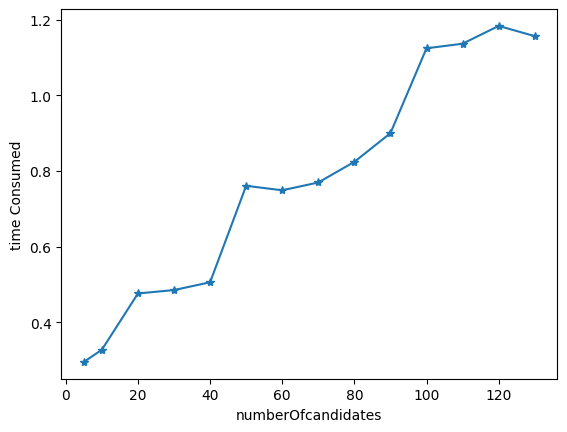

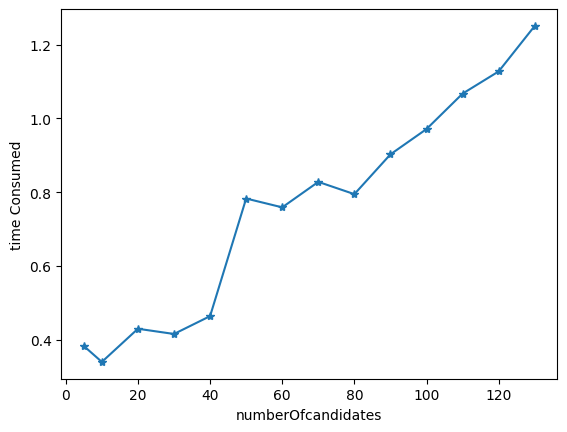

In [40]:
#this partof the code run the simulation for defined number of times and helps us to calcuate average execution time
timeMatrix = []
for i in range(0,30):
    timeList = runSimulation()
    timeMatrix.append(timeList)
    
        


In [35]:
timeMatrix

[[0.40715447399998084,
  0.2737026800023159,
  0.29720276599982753,
  0.40515148200211115,
  0.6021916370009421,
  0.648815956999897,
  0.6876036149988067,
  0.73352318400066,
  0.866407186997094,
  0.994847859001311,
  1.0164051559986547,
  1.1530965470010415,
  1.09875500400085,
  1.2932075360004092],
 [0.2755434739992779,
  0.25224631300079636,
  0.3982484640000621,
  0.49488266999833286,
  0.48416052800166653,
  0.5739425589999883,
  0.6943196790016373,
  0.7845357379992492,
  0.8130715339975723,
  0.920259738999448,
  1.121079626998835,
  1.0422743919989443,
  1.2050976020000235,
  1.1666170559983584],
 [0.38970176299699233,
  0.2959992569994938,
  0.38917397699697176,
  0.5313197010000295,
  0.5605120189975423,
  0.6717266829982691,
  0.7273243129966431,
  0.8779721739992965,
  0.8415631120005855,
  0.8655322689992317,
  1.046767613999691,
  1.0912047369965876,
  1.1135392369978945,
  1.2073952079990704],
 [0.23375497500092024,
  0.3972234180000669,
  0.3428954450027959,
  0.5162

In [36]:
arr = np.array(timeMatrix, dtype='float32')

In [37]:
columns_average = arr.mean(axis=0)

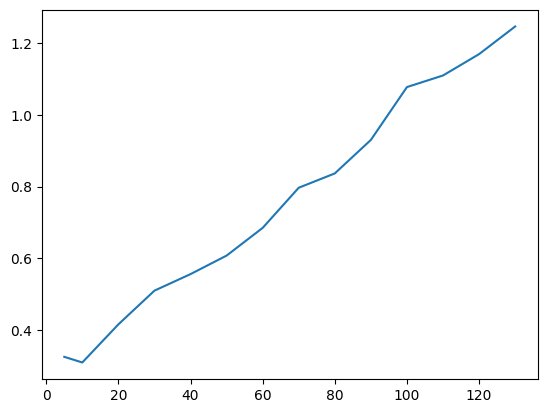

In [38]:
plt.plot([5,10,20,30,40,50,60,70,80,90,100,110,120,130],columns_average)